In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:>

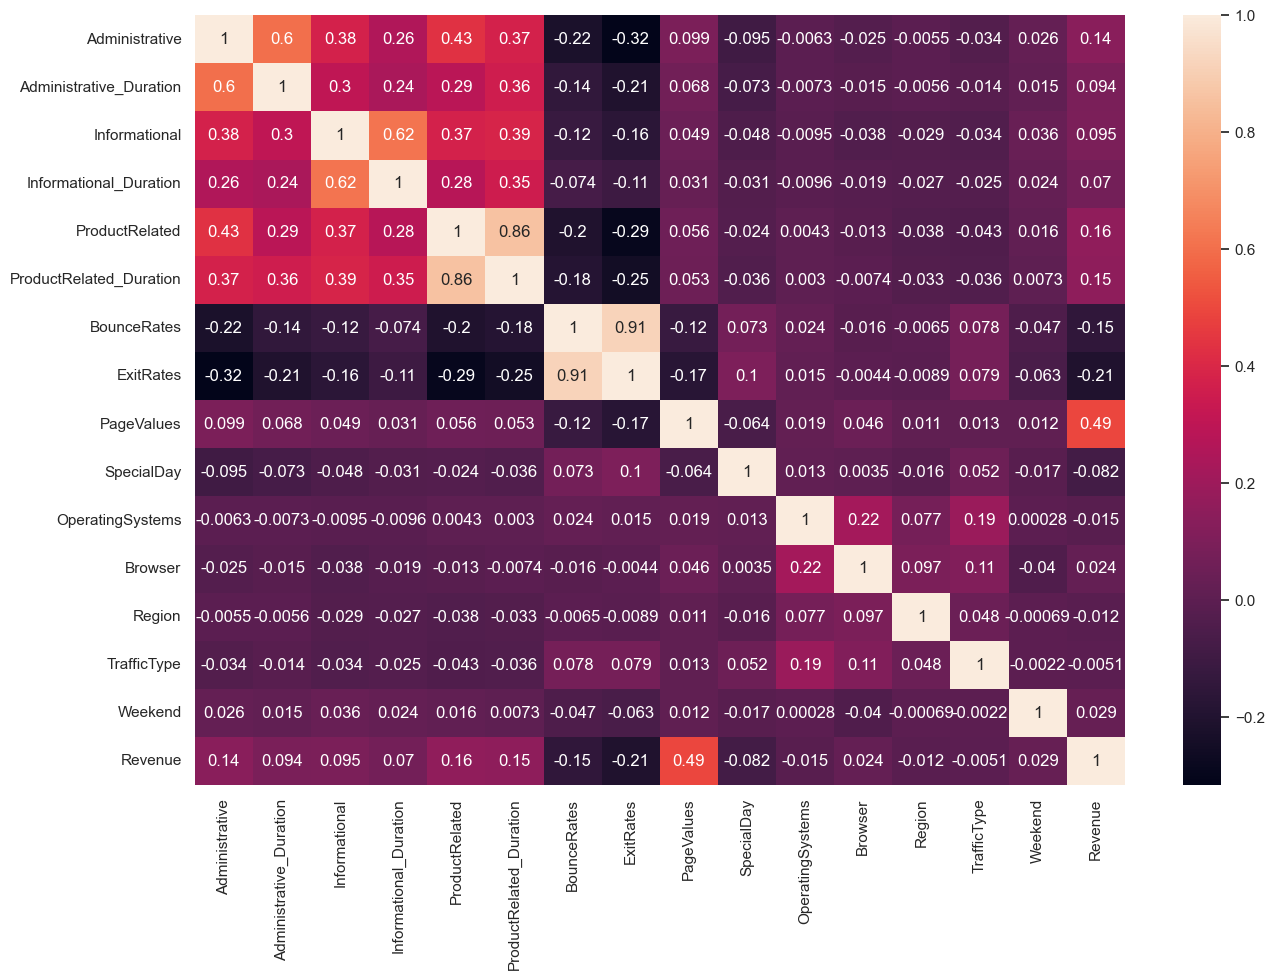

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


The Heat Map shows that there is little correlation among the differnt features with the exception of the following features: 

-> BounceRates & ExitRates (0.91)
-> ProductRelated & ProductRelated_Duration (0.86)

Moderate Correlations: 

-> Administrative and Administrative_Duration (0.6)
-> Information and Informational_Duration (0.62)
-> PageValues and Revenue (0.49)

Page Metrics Analysis

Bounce Rates
Exit Rates
Page Values

<AxesSubplot:xlabel='Page Values', ylabel='Density'>

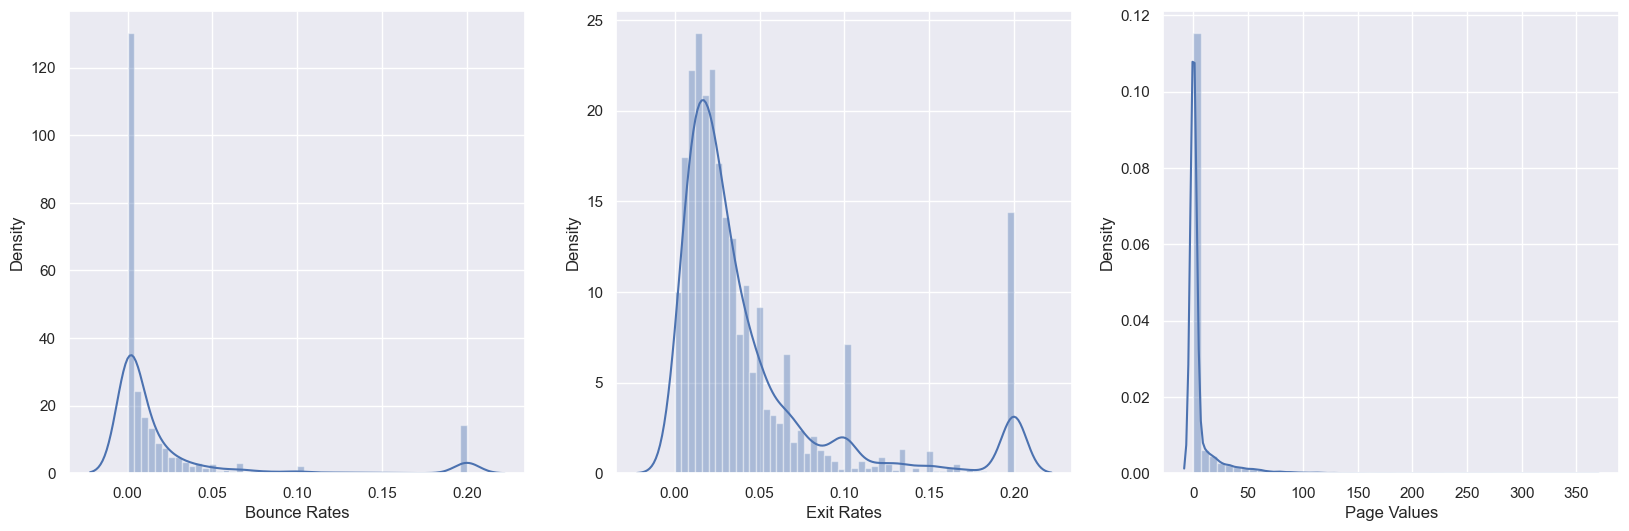

In [9]:
fig,axes = plt.subplots(1,3, figsize=(20,6))

sns.distplot(ax=axes[0], x=df['BounceRates'], axlabel = 'Bounce Rates')
sns.distplot(ax=axes[1], x=df['ExitRates'], axlabel = 'Exit Rates')
sns.distplot(ax=axes[2], x=df['PageValues'], axlabel = 'Page Values')

We can clearly see from the distribution plots that the data for all three variables are right skewed and also possess a lot of outliers

The average bounce rate of most of our data points is low which is a positive observation as high rates would indicate that visitors are not engaging with the website.


Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to rise

# Revenue Analysis

### Distribution of Target Feature (Revenue)

In [10]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [11]:
revenue_ratio = df.Revenue.value_counts(normalize = True)
revenue_ratio

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

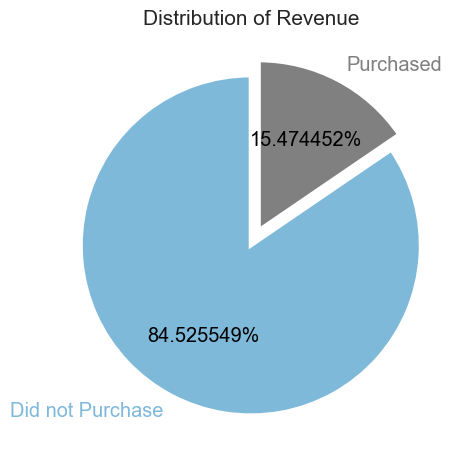

In [12]:
fig, ax =  plt.subplots(figsize = (5,5))

x = revenue_ratio

cmap = plt.get_cmap('Blues')
colors = list(cmap(np.linspace(0.45,len(x))))

colors[1] = 'Grey'
labels = ['Did not Purchase', 'Purchased']

patches, texts, pcts = ax.pie(
    x, labels = labels, autopct = '%2f%%',
    wedgeprops = {'linewidth' : 3.0, 'edgecolor' : 'white'},
    textprops = {'size' : 'large'},
    startangle = 90,
    colors = colors,
    explode = (0,0.1))

for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color = 'black')
plt.setp(texts, fontweight = 500)
ax.set_title('Distribution of Revenue', fontsize = 15)
plt.tight_layout()

There is an imbalance in the output variable "Revenue", with 84.53% of visitors not making a purchase and only 15.47% completing a purchase.


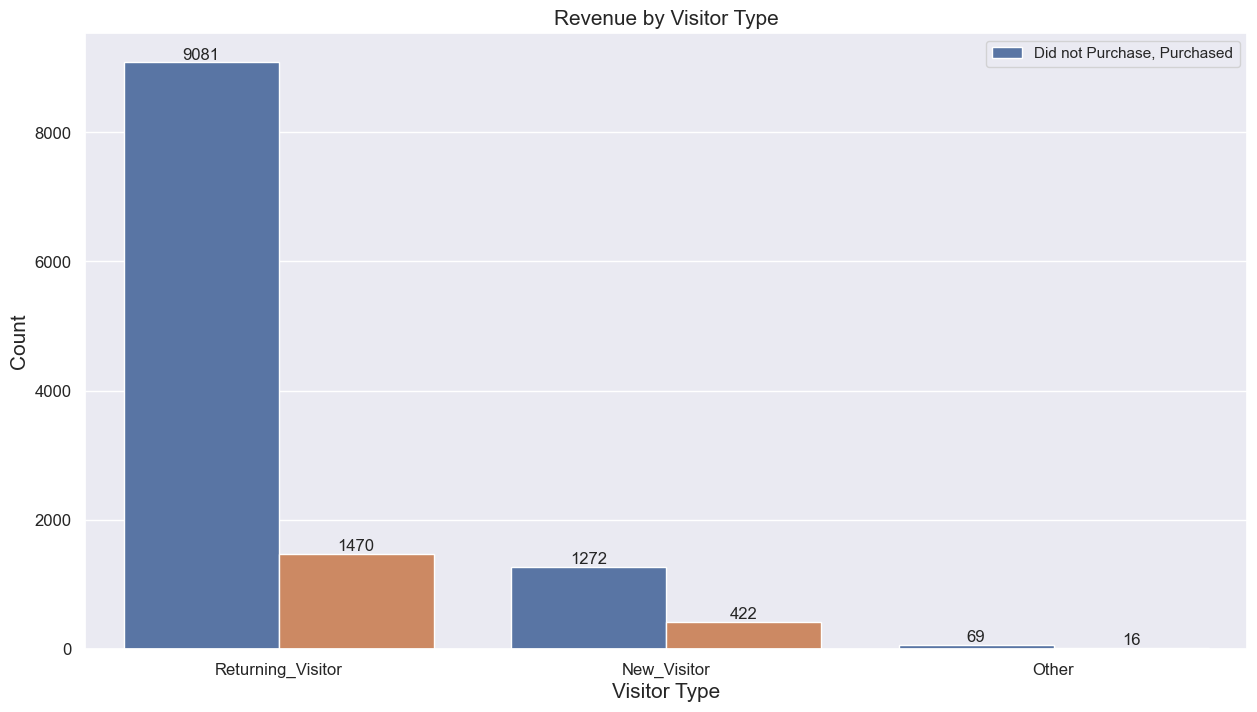

In [13]:
## Revenue by Visitor Type

plt.figure(figsize = (15,8))
plt.title("Revenue by Visitor Type", fontsize = 15)
ax = sns.countplot(x='VisitorType', data = df, hue = 'Revenue')
ax.legend(labels=['Did not Purchase, Purchased'])
for i in ax.containers:
        ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

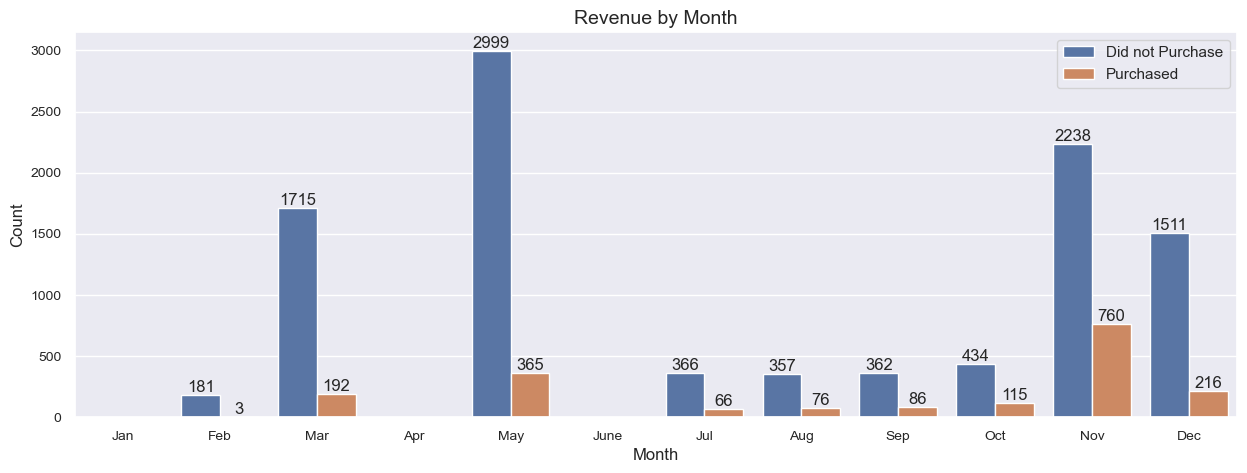

In [14]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=df, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In January and April, there wereno website visits recorded.

A lot of transactions happens towards the end of the year, with November and December recording the highest and third-highest Revenue generated. Altough, these months do not have the highest websites visits recorded.

The top 4 months with the most visits are May, November, March, and December.

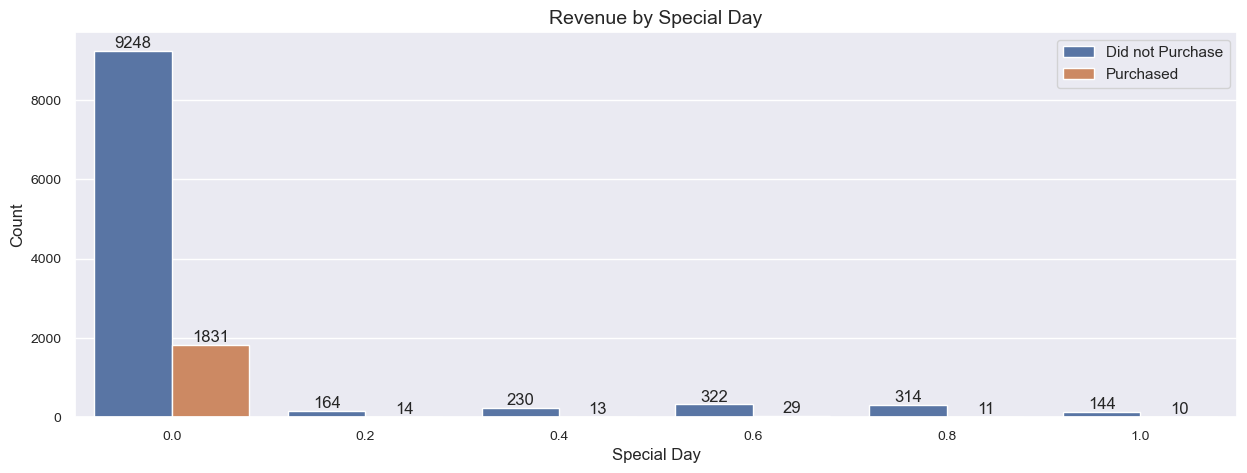

In [15]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=df, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

There were significantly more websites visitiors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.

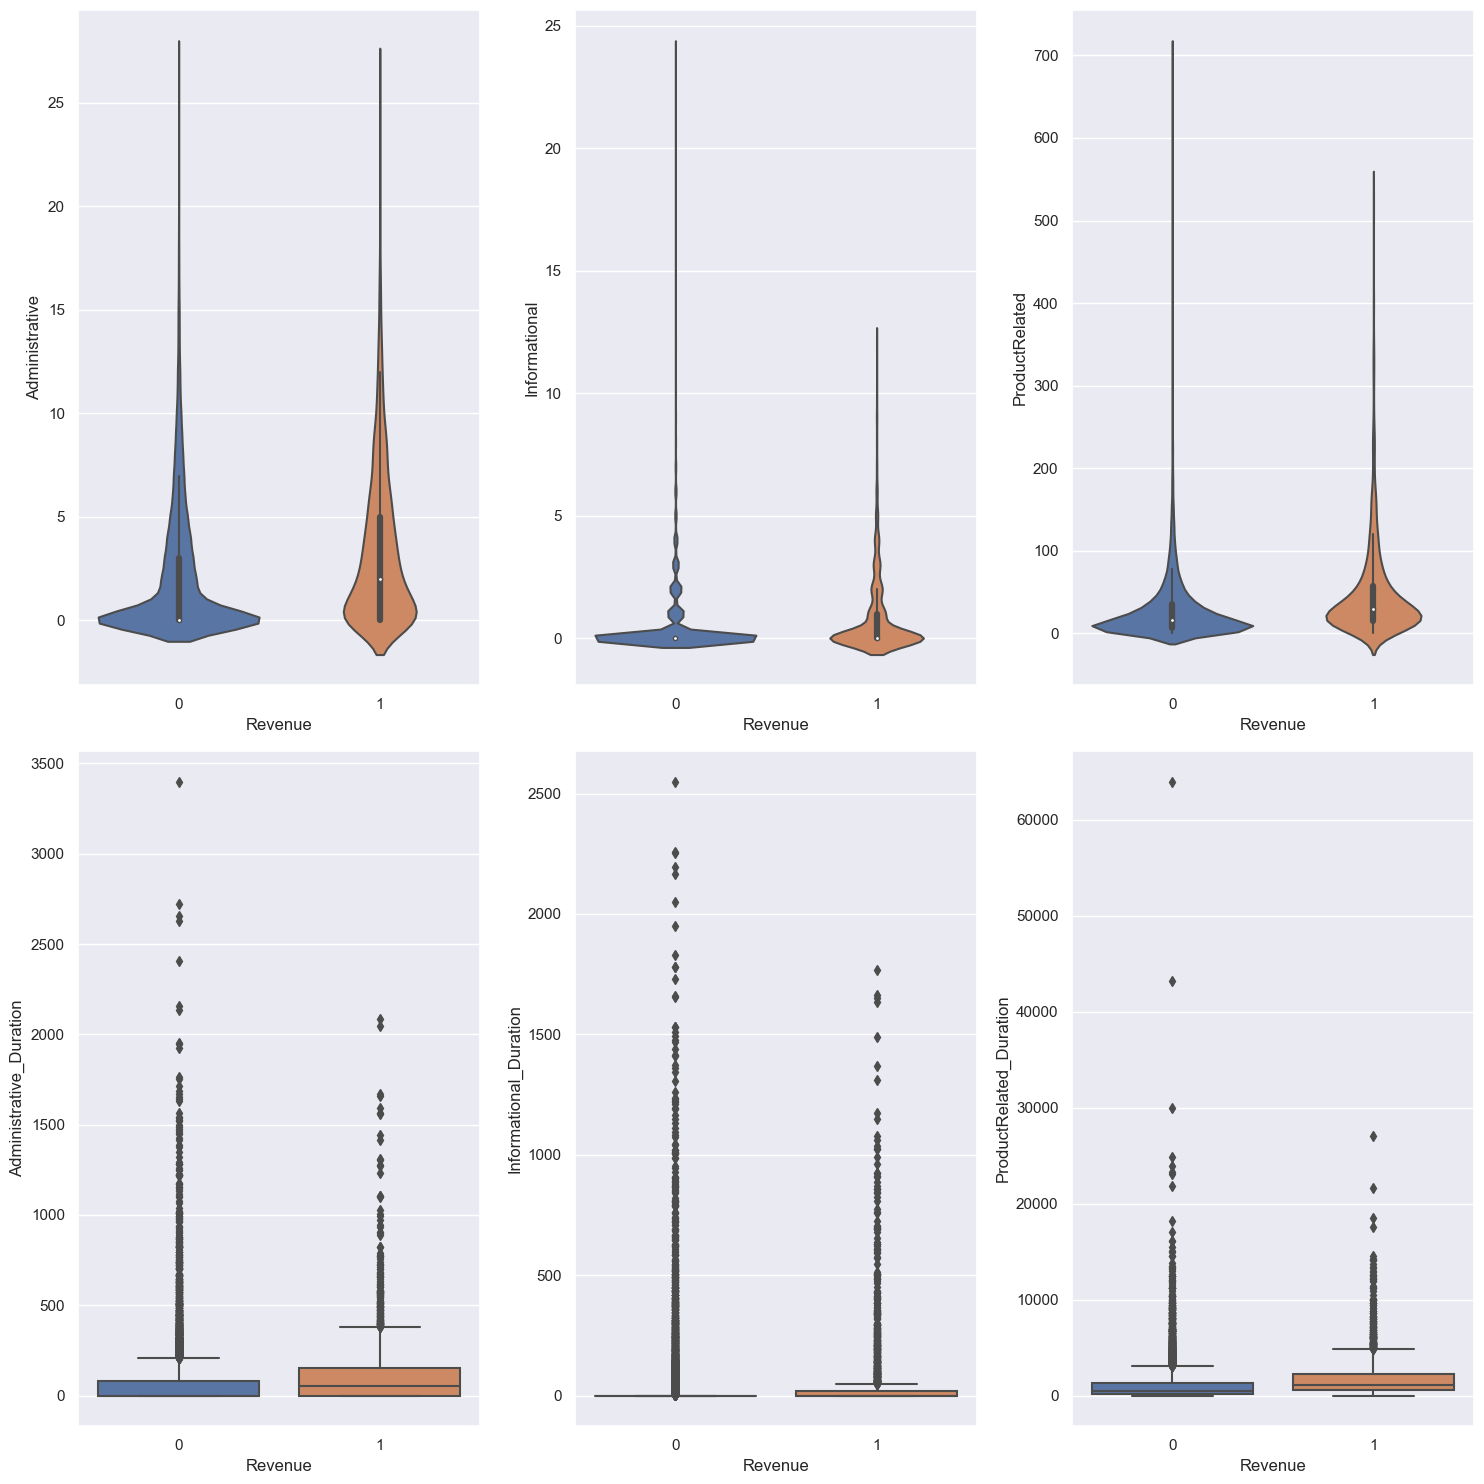

In [16]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

Visitors tent to visit less pages, and spend less time, if they are not going to make a purchase.

The number of product related pages visited and time spend on them is more than that for account related or informational pages

#  Data Pre-Processing

Encode Categorical features using dummy encoding.

Encode Boolean variables using label encoder

Split Data into train and test set

Scale train set using the standard scaler

In [17]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(df[categorical])
encoded_features.head(10)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0,0,1,0,0,0,0,0,0,0,0,0,1


In [18]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([df, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [19]:
# Encode Boolean variables using label Encoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


In [20]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [21]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [22]:
#Scale train set using Standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [23]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
10529,-0.705428,-0.454259,-0.397045,-0.243075,-0.494378,-0.155280,-0.454012,-0.258786,-0.316403,-0.308488,...,-0.182432,-0.156368,-0.43343,-0.606132,1.774688,-0.224177,-0.191721,-0.401075,-0.086432,0.413449
10248,-0.705428,-0.454259,-0.397045,-0.243075,0.134890,0.023285,-0.454012,-0.649393,-0.316403,-0.308488,...,-0.182432,-0.156368,-0.43343,-0.606132,1.774688,-0.224177,-0.191721,-0.401075,-0.086432,0.413449
2249,-0.403865,-0.228623,2.772339,2.282369,-0.089849,-0.223363,0.053785,0.000764,0.715642,-0.308488,...,-0.182432,-0.156368,-0.43343,1.649807,-0.563479,-0.224177,-0.191721,-0.401075,-0.086432,0.413449
4336,-0.102303,-0.085537,-0.397045,-0.243075,-0.629221,-0.598371,-0.454012,-0.189151,-0.316403,-0.308488,...,-0.182432,-0.156368,-0.43343,1.649807,-0.563479,-0.224177,-0.191721,-0.401075,-0.086432,0.413449
7734,-0.403865,0.920469,1.187647,4.828156,-0.539326,0.518005,-0.454012,-0.885503,-0.316403,-0.308488,...,-0.182432,-0.156368,-0.43343,-0.606132,1.774688,-0.224177,-0.191721,2.493302,-0.086432,-2.418677


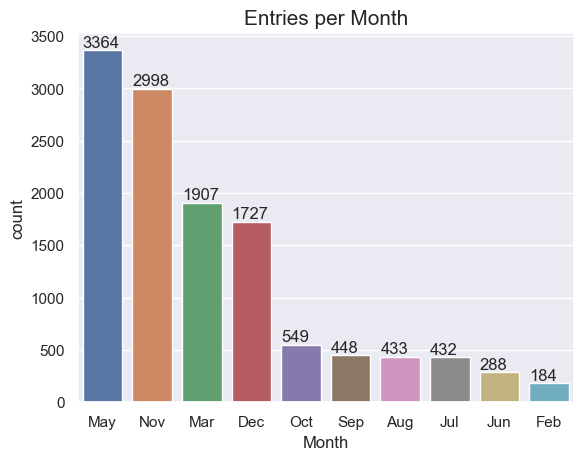

In [24]:
month = df['Month'].value_counts()

sns.countplot(df['Month'], order=month.index)
plt.title('Entries per Month', fontsize=15)
xval = -0.4

for index, value in month.items():
    plt.text(x=xval, y=value+30, s=str(value))
    xval += 1
plt.show()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


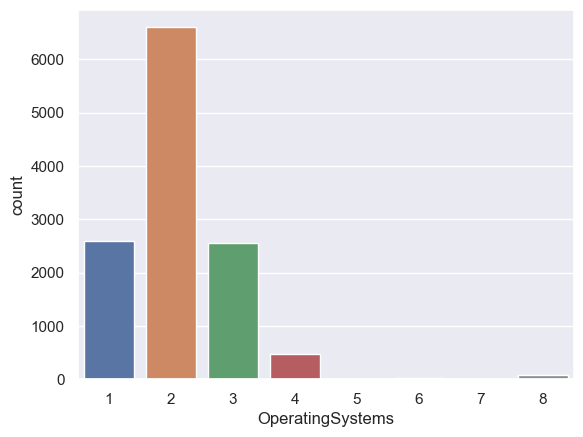

In [25]:
print(df['OperatingSystems'].value_counts())
ax = sns.countplot(x='OperatingSystems', data=df)

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


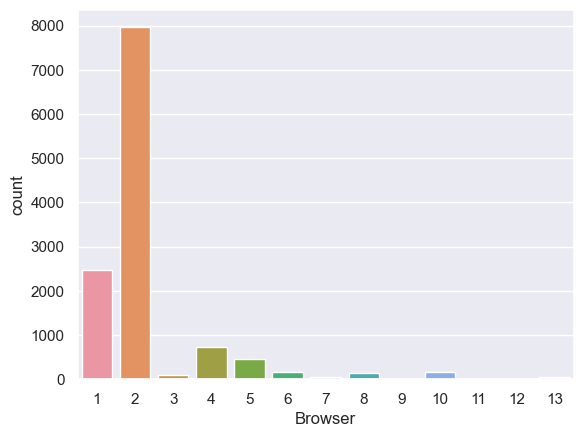

In [26]:
print(df['Browser'].value_counts())
ax = sns.countplot(x='Browser', data=df)

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


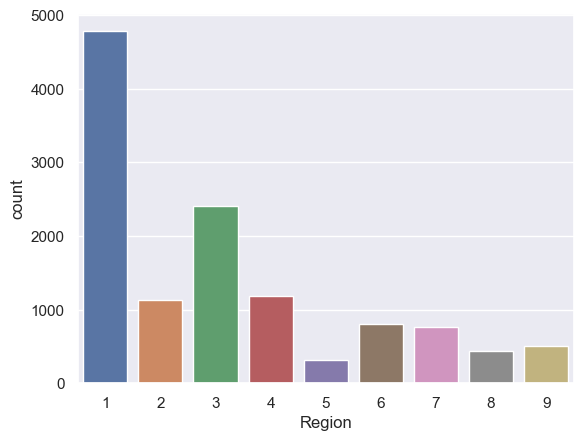

In [27]:
print(df['Region'].value_counts())
ax = sns.countplot(x='Region', data=df)
# We decide not to use Region

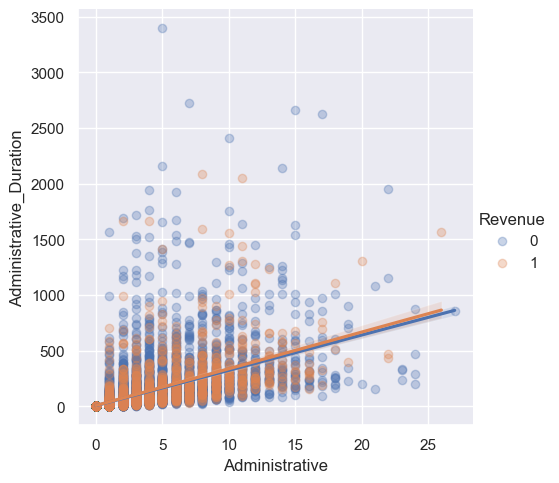

In [28]:
sns.lmplot(x="Administrative", y="Administrative_Duration", data=df, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

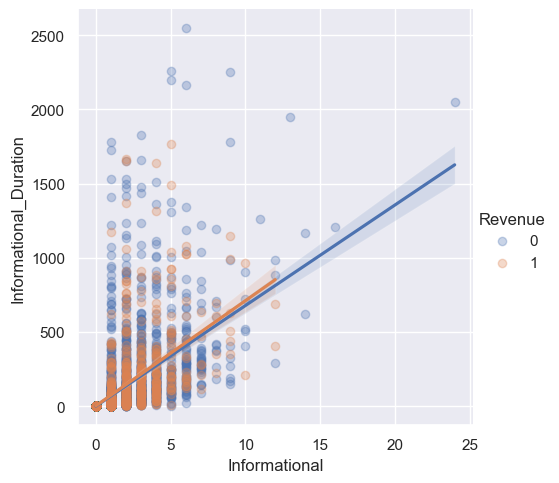

In [29]:
sns.lmplot(x="Informational", y="Informational_Duration", data=df, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

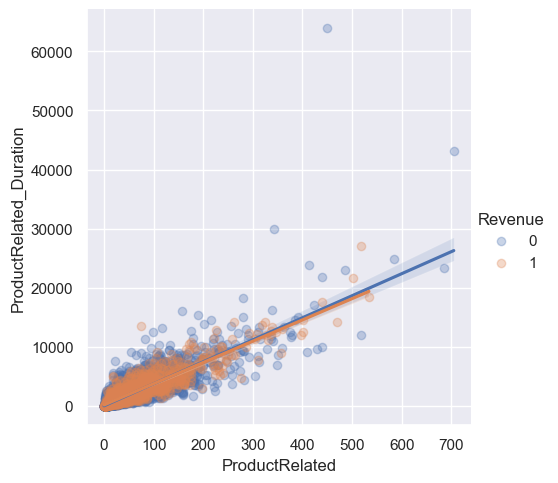

In [30]:
sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", data=df, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

In [31]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [32]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [33]:
#Scale train set using Standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [34]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
11787,-0.701931,-0.464783,1.947475,0.230159,0.294264,0.455878,-0.368349,-0.460281,-0.312574,-0.30379,...,-0.19107,-0.154806,-0.430408,-0.605595,-0.570973,-0.221024,-0.191721,-0.395804,-0.082252,0.407089
4940,0.502815,-0.008191,-0.400977,-0.249780,-0.353951,-0.537342,0.312766,0.227131,-0.312574,-0.30379,...,-0.19107,-0.154806,-0.430408,1.651267,-0.570973,-0.221024,-0.191721,-0.395804,-0.082252,0.407089
8877,1.707561,3.165123,-0.400977,-0.249780,0.450730,1.192441,-0.457676,-0.807910,5.365090,-0.30379,...,-0.19107,-0.154806,-0.430408,-0.605595,1.751396,-0.221024,-0.191721,-0.395804,-0.082252,0.407089
10869,-0.400744,-0.350635,-0.400977,-0.249780,0.137799,0.037656,-0.457676,-0.290139,1.341066,-0.30379,...,-0.19107,-0.154806,-0.430408,-0.605595,-0.570973,-0.221024,-0.191721,-0.395804,-0.082252,0.407089
8219,-0.701931,-0.464783,-0.400977,-0.249780,-0.219837,0.106660,-0.457676,-0.786205,-0.312574,-0.30379,...,-0.19107,-0.154806,-0.430408,-0.605595,1.751396,-0.221024,-0.191721,2.526506,-0.082252,-2.456467


Modelling

Train and evaluate models. Predictive models that will be used are Logistic Regression, KNeighbors Classifier, SVM, Decision Tree and Random Forest Classifier.

The Scaled Dataset would be used for :- Logistic Regression, KNN and SVM.

The Unscaled Dataset would be used for :- Decision Tree and Random Forest Classifier.

Hyperparameter Tuning for the model with the best performance to try to improve its performance further.

Inspect Feature importance (Top 10 features)

Evaluate with Cross Validation

In [35]:
# Initialize models

LR = LogisticRegression()
KN = KNeighborsClassifier()
SV = SVC()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [36]:
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

   # ax.set_title(f'Confusion Matix for {prediction.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

    plt.show()


For Logistic Regression, Accuracy score is  0.8826709921600433
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3116
           1       0.77      0.37      0.50       583

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699

[[3052   64]
 [ 370  213]]

	Confusion Matrix for Logistic Regression


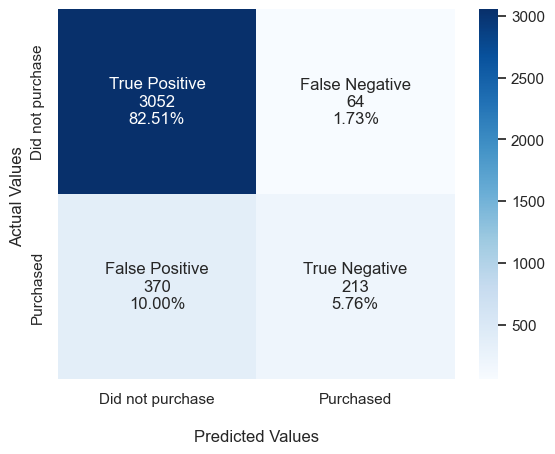


For KNeighbors, Accuracy score is  0.8761827520951608
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3116
           1       0.72      0.36      0.47       583

    accuracy                           0.88      3699
   macro avg       0.80      0.66      0.70      3699
weighted avg       0.86      0.88      0.86      3699

[[3034   82]
 [ 376  207]]

	Confusion Matrix for K-Nearest Neighbors


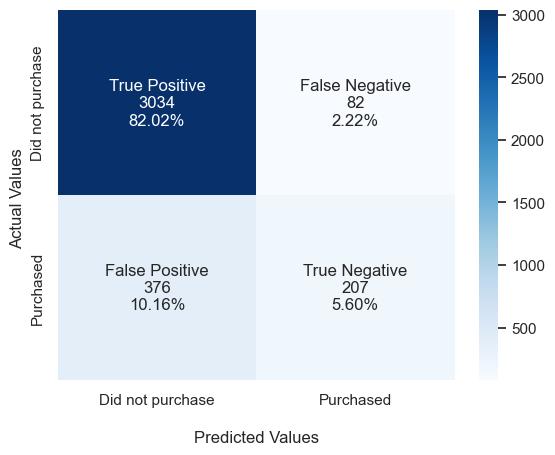


For SVM, Accuracy score is  0.8918626655852934
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3116
           1       0.79      0.43      0.56       583

    accuracy                           0.89      3699
   macro avg       0.84      0.70      0.75      3699
weighted avg       0.88      0.89      0.88      3699

[[3048   68]
 [ 332  251]]

	Confusion Matrix for SVM


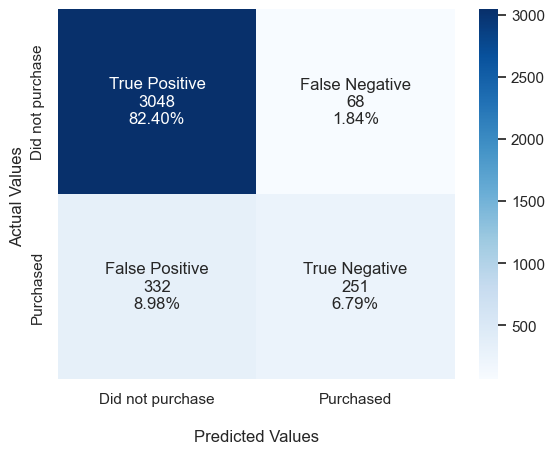

In [37]:
# For Logistic Regression, KNN and SVM, we will use the scaled dataset

LR = LogisticRegression()
LR = LR.fit(X_train_scaled, y_train) 
LR_preds = LR.predict(X_test_scaled) 
print('\nFor Logistic Regression, Accuracy score is ', accuracy_score(y_test,LR_preds))
print(classification_report(y_test, LR_preds))
print(confusion_matrix(y_test, LR_preds))
print('\n\tConfusion Matrix for Logistic Regression')
c_matrix_plot(y_test, LR_preds)

KN = KNeighborsClassifier()
KN = KN.fit(X_train_scaled, y_train) 
KN_preds = KN.predict(X_test_scaled) 
print('\nFor KNeighbors, Accuracy score is ', accuracy_score(y_test,KN_preds))
print(classification_report(y_test, KN_preds))
print(confusion_matrix(y_test, KN_preds))
print('\n\tConfusion Matrix for K-Nearest Neighbors')
c_matrix_plot(y_test, KN_preds)

SV = SVC()
SV = SV.fit(X_train_scaled, y_train) 
SV_preds = SV.predict(X_test_scaled) 
print('\nFor SVM, Accuracy score is ', accuracy_score(y_test,SV_preds))
print(classification_report(y_test, SV_preds))
print(confusion_matrix(y_test, SV_preds))
print('\n\tConfusion Matrix for SVM')
c_matrix_plot(y_test, SV_preds)


For Decision Tree Classifier, Accuracy score is  0.8680724520140578
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3116
           1       0.58      0.60      0.59       583

    accuracy                           0.87      3699
   macro avg       0.75      0.76      0.75      3699
weighted avg       0.87      0.87      0.87      3699

[[2864  252]
 [ 236  347]]

	Confusion Matrix for Decision Tree


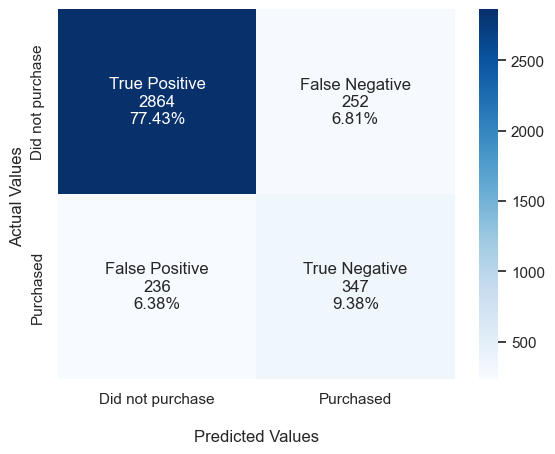


For Random Forest Classifier, Accuracy score is  0.9032170856988375
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3116
           1       0.77      0.56      0.64       583

    accuracy                           0.90      3699
   macro avg       0.84      0.76      0.79      3699
weighted avg       0.90      0.90      0.90      3699

[[3017   99]
 [ 259  324]]

	Confusion Matrix for Random Forest


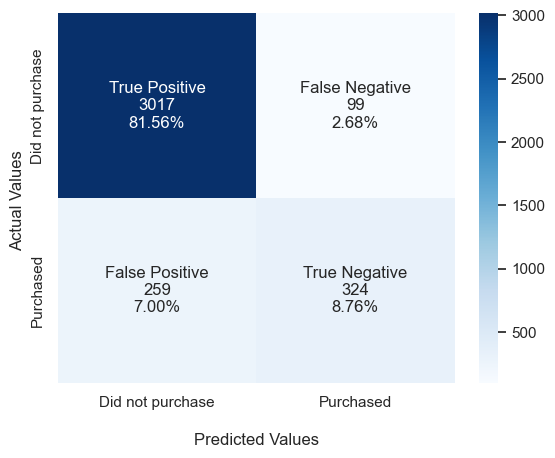

In [38]:
# For Decision Tree Classifier and Random Forest, we will use the unscaled dataset to train the models

DC = DecisionTreeClassifier()
DC = DC.fit(X_train, y_train) 
DC_preds = DC.predict(X_test) 
print('\nFor Decision Tree Classifier, Accuracy score is ', accuracy_score(y_test,DC_preds))
print(classification_report(y_test,DC_preds))
print(confusion_matrix(y_test,DC_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test,DC_preds)

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train) 
RF_preds = RF.predict(X_test) 
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test,RF_preds))
print(confusion_matrix(y_test,RF_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test,RF_preds)

# Feature Importance


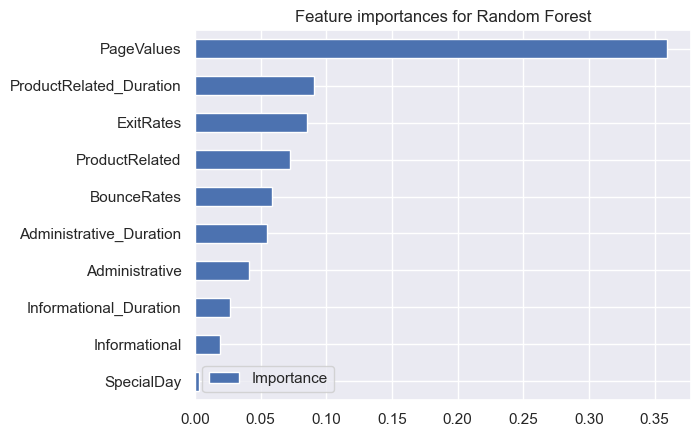

In [39]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [40]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'Administrative', 'Administrative_Duration', 'BounceRates',
       'ProductRelated', 'ExitRates', 'ProductRelated_Duration',
       'PageValues'], dtype=object)

In [41]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [42]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy:')
    print(accuracy_scores)
    print(model.__class__.__name__,'Mean Accuracy: %.3f' % (mean(accuracy_scores)))
    
    precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    print('\nPrecision:')
    print(precision_scores)
    print(model.__class__.__name__,'Mean Precision: %.3f' % (mean(precision_scores)))
    
    recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    print('\nRecall:')
    print(recall_scores)
    print(model.__class__.__name__,'Mean Recall: %.3f' % (mean(recall_scores)))

In [44]:
trainer_with_cv(RF,X,y)

Accuracy:
[0.90835361 0.91321979 0.90754258 0.89699919 0.89294404 0.90429846
 0.90673155 0.9107867  0.90186537 0.89618816]
RandomForestClassifier Mean Accuracy: 0.904

Precision:
[0.78070175 0.68571429 0.75862069 0.76388889 0.72789116 0.72180451
 0.712      0.79245283 0.78658537 0.76219512]
RandomForestClassifier Mean Precision: 0.749

Recall:
[0.50285714 0.55555556 0.59668508 0.55609756 0.53535354 0.53888889
 0.57317073 0.60096154 0.56682028 0.58851675]
RandomForestClassifier Mean Recall: 0.561


# The Cross Validation result shows that the Random Forest Classifier Model is able to generalize to new data.

In summary,

In this project, we developed models that can categorize website users and forecast whether or not they would make a purchase there.

Tests were conducted on five (5) learning classifiers: Random Forest, KNN, SVM, Decision Tree, and Logistic Regression.

The Random Forest Classifier performed the best, achieving an F-1 Score of 62% and an accuracy of 90%.

It was discovered that the Page Values Feature was the most crucial component in predicting a website visitor's desire to make a purchase. The type of pages visited, the duration spent on the pages, the exit and bounce rates are additional significant features.

The Random Forest Classifier's ability to generalize to new data is demonstrated by the cross validation result.